In [1]:
import pandas as pd
data = pd.read_csv('cleaned_HousePricesDataSet2.csv')

In [2]:
data.head()

,MSZoning,LotArea,Street,LandContour,Utilities,HouseStyle,YearBuilt,TotalBsmtSF,CentralAir,Electrical,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,RL,8450,PAVE,LVL,ALLPUB,2STORY,2003,856,Y,SBRKR,...,2.0,1,3,1,8,0,2,2,2008,208500
1,RL,9600,PAVE,LVL,ALLPUB,1STORY,1976,1262,Y,SBRKR,...,2.0,0,3,1,6,1,2,5,2007,181500
2,RL,11250,PAVE,LVL,ALLPUB,2STORY,2001,920,Y,SBRKR,...,2.0,1,3,1,6,1,2,9,2008,223500
3,RL,9550,PAVE,LVL,ALLPUB,2STORY,1915,756,Y,SBRKR,...,1.0,0,3,1,7,1,3,2,2006,140000
4,RL,14260,PAVE,LVL,ALLPUB,2STORY,2000,1145,Y,UNKNOWN,...,2.0,1,4,1,9,1,3,12,2008,250000


In [3]:
data.dtypes

MSZoning         object
LotArea           int64
Street           object
LandContour      object
Utilities        object
HouseStyle       object
YearBuilt         int64
TotalBsmtSF       int64
CentralAir       object
Electrical       object
1stFlrSF          int64
FullBath        float64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
MoSold            int64
YrSold            int64
SalePrice         int64
dtype: object

1. Identify Categorical Feaures

In [4]:
# Identify columns which are categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [5]:
# print the unique values in the categorical columns
for cat_name in categorical_cols:
    print(f'{cat_name} : {data[cat_name].unique()}')

MSZoning : ['RL' 'RM' 'C (ALL)' 'FV' 'RH']
Street : ['PAVE' 'GRVL']
LandContour : ['LVL' 'BNK' 'LOW' 'HLS']
Utilities : ['ALLPUB' 'NOSEWA']
HouseStyle : ['2STORY' '1STORY' '1.5FIN' '1.5UNF' 'SFOYER' 'SLVL' '2.5UNF' '2.5FIN']
CentralAir : ['Y' 'N']
Electrical : ['SBRKR' 'UNKNOWN' 'FUSEF' 'FUSEA' 'FUSEP' 'MIX']


In [6]:
# Identify binary columns
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]

In [7]:
print(binary_cols)

['Street', 'Utilities', 'CentralAir']


In [8]:
# Identify Nominal columns
nominal_cols = [col for col in categorical_cols if col not in binary_cols]

In [9]:
print(nominal_cols)

['MSZoning', 'LandContour', 'HouseStyle', 'Electrical']


1.1 Encoding Binary features

In [10]:
data['Street'] = data['Street'].replace( {'PAVE': 1, 'GRVL': 0, 'Unknown': -1})
data['Utilities'] = data['Utilities'].replace( {'ALLPUB': 1, 'NOSEWA': 0, 'Unknown': -1})
data['CentralAir'] = data['CentralAir'].replace( {'Y': 1, 'N': 0, 'Unknown': -1})

C:\Users\uizjm1\AppData\Local\Temp\ipykernel_18952\768739994.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Street'] = data['Street'].replace( {'PAVE': 1, 'GRVL': 0, 'Unknown': -1})
C:\Users\uizjm1\AppData\Local\Temp\ipykernel_18952\768739994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Utilities'] = data['Utilities'].replace( {'ALLPUB': 1, 'NOSEWA': 0, 'Unknown': -1})
C:\Users\uizjm1\AppData\Local\Temp\ipykernel_18952\768739994.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

In [11]:
# print the unique values in the categorical columns
for column in binary_cols:
    print(f'{column}: {data[column].nunique()} unique values')
    print(data[column].unique())

Street: 2 unique values
[1 0]
Utilities: 2 unique values
[1 0]
CentralAir: 2 unique values
[1 0]


1.2 Encode Nominal features


In [13]:
# Encode nominal columns using one-hot encoding
# Display the shape of the data before encoding
print(data.shape)

(1457, 21)


In [14]:
nominal_cols

['MSZoning', 'LandContour', 'HouseStyle', 'Electrical']

In [15]:
# Encode the nominal columns using one-hot encoding
from operator import index
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore')

# Fit the OneHotEncoder to the nominal columns
onehot.fit(data[nominal_cols])
# Transform the nominal columns
encoded = onehot.transform(data[nominal_cols]).toarray()  # type: ignore
# Save one-hot functionality as pickle file
import pickle
pickle.dump(onehot, open('onehot_houseprice.pkl', 'wb'))

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=onehot.get_feature_names_out(), index=data.index)

# Drop the original nominal columns from the DataFrame
data = data.drop(columns=nominal_cols)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
data = pd.concat([encoded_df, data], axis=1)

In [16]:
data.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,3,1,8,0,2,2,2008,208500
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0,3,1,6,1,2,5,2007,181500
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,3,1,6,1,2,9,2008,223500
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0,3,1,7,1,3,2,2006,140000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,4,1,9,1,3,12,2008,250000


In [18]:
data.shape

(1457, 40)

In [19]:
# Check if we got any object columns left
print(data.select_dtypes(include=['object']).columns.tolist())

[]


In [20]:
data.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,3,1,8,0,2,2,2008,208500
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0,3,1,6,1,2,5,2007,181500
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,3,1,6,1,2,9,2008,223500
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0,3,1,7,1,3,2,2006,140000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,4,1,9,1,3,12,2008,250000


In [21]:
# Save the modelled data to a new CSV file
data.to_csv('modelled_Housepice.csv', index=False)

2. Feature Scalling - Performed after splitting the dta into train and test sets

  2.1 Split data into inputs and outputs

In [22]:
import pandas as pd
data = pd.read_csv('modelled_Housepice.csv')

In [23]:
data.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,3,1,8,0,2,2,2008,208500
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0,3,1,6,1,2,5,2007,181500
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,3,1,6,1,2,9,2008,223500
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0,3,1,7,1,3,2,2006,140000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1,4,1,9,1,3,12,2008,250000


In [24]:
# Extract the target column

output = data['SalePrice']
input = data.drop(columns=['SalePrice'])

In [25]:
output.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [26]:
input.columns

Index(['MSZoning_C (ALL)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_BNK', 'LandContour_HLS', 'LandContour_LOW',
       'LandContour_LVL', 'HouseStyle_1.5FIN', 'HouseStyle_1.5UNF',
       'HouseStyle_1STORY', 'HouseStyle_2.5FIN', 'HouseStyle_2.5UNF',
       'HouseStyle_2STORY', 'HouseStyle_SFOYER', 'HouseStyle_SLVL',
       'Electrical_FUSEA', 'Electrical_FUSEF', 'Electrical_FUSEP',
       'Electrical_MIX', 'Electrical_SBRKR', 'Electrical_UNKNOWN', 'LotArea',
       'Street', 'Utilities', 'YearBuilt', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

In [27]:

from sklearn.model_selection import train_test_split

In [28]:
data.shape

(1457, 40)

In [29]:
# Split the data into training and testing sets
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, shuffle=True, random_state=42)

In [30]:
input_train.shape

(1165, 39)

In [31]:
input_train.reset_index(drop=True, inplace=True)

In [32]:
input_train.shape

(1165, 39)

In [33]:
input_train.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1314,1.0,0,3,1,5,0,1,6,2010
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,520,2.0,1,2,1,4,0,2,4,2006
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,800,1.0,0,1,1,4,1,0,1,2009
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1136,1.0,0,3,1,8,0,2,10,2009
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,789,1.0,0,2,1,5,0,1,6,2007


In [34]:
output_train.reset_index(drop=True, inplace=True)

In [35]:
output_train.head()

0    145000
1    144152
2     60000
3    167500
4     96500
Name: SalePrice, dtype: int64

In [36]:
output_train.value_counts()

SalePrice
135000    13
155000    12
110000    12
140000    12
145000    11
          ..
239799     1
97000      1
318000     1
67000      1
189950     1
Name: count, Length: 574, dtype: int64

In [37]:
input_test.reset_index(drop=True, inplace=True)

In [38]:
input_test.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1133,2.0,0,4,1,8,0,1,6,2008
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1337,2.0,0,2,1,5,0,2,8,2008
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1056,1.0,0,3,1,5,0,2,1,2006
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1771,1.0,0,3,1,9,1,2,11,2009
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,845,1.0,0,3,1,5,0,1,1,2009


In [39]:
output_test.reset_index(drop=True, inplace=True)

In [40]:
output_test.head()

0    184000
1    181000
2    145000
3    115000
4     84000
Name: SalePrice, dtype: int64

2.2 Perform scalling on training data and use the scaler to convert the test data

In [41]:
# Perform feature scaling on the data - MinMaxScaler
# By only fitting the scaler to the training data, you ensure that the model does not have access to information from the test set during training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(input_train) # fit and transform the training data
X_test_transformed = scaler.transform(input_test) # only transform the test data

In [42]:
pickle.dump(scaler, open('minmax_scaler_houseprice.pkl', 'wb'))

In [43]:
X_train_transformed

array([[0.        , 0.        , 0.        , ..., 0.25      , 0.45454545,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.27272727,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.75      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.45454545,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.54545455,
        0.25      ]])

In [44]:
X_test_transformed

array([[0.        , 0.        , 0.        , ..., 0.25      , 0.45454545,
        0.5       ],
       [0.        , 0.        , 1.        , ..., 0.5       , 0.63636364,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.36363636,
        0.75      ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ]])

In [602]:
print(type(X_train_transformed))
print(type(X_test_transformed))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [603]:
input.columns

Index(['MSZoning_C (ALL)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_BNK', 'LandContour_HLS', 'LandContour_LOW',
       'LandContour_LVL', 'HouseStyle_1.5FIN', 'HouseStyle_1.5UNF',
       'HouseStyle_1STORY', 'HouseStyle_2.5FIN', 'HouseStyle_2.5UNF',
       'HouseStyle_2STORY', 'HouseStyle_SFOYER', 'HouseStyle_SLVL',
       'Electrical_FUSEA', 'Electrical_FUSEF', 'Electrical_FUSEP',
       'Electrical_MIX', 'Electrical_SBRKR', 'Electrical_UNKNOWN', 'LotArea',
       'Street', 'Utilities', 'YearBuilt', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

In [45]:
# Convert the numpy arrays to pandas DataFrame
input_train = pd.DataFrame(X_train_transformed, columns=input.columns)
input_test = pd.DataFrame(X_test_transformed, columns=input.columns)

In [46]:
input_train.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.224874,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.454545,1.00
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.042680,0.75,0.5,0.250,0.333333,0.166667,0.000000,0.50,0.272727,0.00
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.106930,0.50,0.0,0.125,0.333333,0.166667,0.333333,0.00,0.000000,0.75
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.184029,0.50,0.0,0.375,0.333333,0.500000,0.000000,0.50,0.818182,0.75
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.104406,0.50,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.454545,0.25


In [47]:
input_train.describe()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,...,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,0.006009,0.043777,0.012017,0.791416,0.146781,0.041202,0.033476,0.023176,0.902146,0.110730,...,0.190361,0.642060,0.191845,0.358798,0.349070,0.377754,0.207439,0.443348,0.482560,0.455365
std,0.077315,0.204686,0.109009,0.406471,0.354040,0.198842,0.179954,0.150527,0.297245,0.313932,...,0.089015,0.142055,0.251067,0.102680,0.073376,0.135026,0.216232,0.187131,0.242322,0.330383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.125746,0.500000,0.000000,0.250000,0.333333,0.250000,0.000000,0.250000,0.363636,0.250000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.173015,0.750000,0.000000,0.375000,0.333333,0.333333,0.333333,0.500000,0.454545,0.500000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.242542,0.750000,0.500000,0.375000,0.333333,0.416667,0.333333,0.500000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
input_test.describe()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000
mean,0.010274,0.047945,0.006849,0.780822,0.154110,0.047945,0.037671,0.030822,0.883562,0.085616,...,0.189359,0.628425,0.191781,0.356592,0.347032,0.371861,0.192922,0.434932,0.490037,0.44863
std,0.101012,0.214017,0.082618,0.414400,0.361674,0.214017,0.190727,0.173132,0.321300,0.280277,...,0.087797,0.152967,0.253906,0.098493,0.071814,0.136659,0.209718,0.186657,0.260285,0.33919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008720,0.000000,0.000000,0.000000,0.333333,0.083333,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.125402,0.500000,0.000000,0.250000,0.333333,0.250000,0.000000,0.250000,0.272727,0.25000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.172671,0.750000,0.000000,0.375000,0.333333,0.333333,0.333333,0.500000,0.454545,0.50000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.241625,0.750000,0.500000,0.375000,0.333333,0.416667,0.333333,0.500000,0.636364,0.75000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.588343,1.000000,1.000000,0.750000,1.000000,0.833333,1.000000,1.000000,1.000000,1.00000


In [49]:
# Save training and test sets into CSV files
training_set = pd.concat([input_train, output_train], axis=1)
test_set = pd.concat([input_test, output_test], axis=1)

In [609]:
training_set.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.454545,1.00,145000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.75,0.5,0.250,0.333333,0.166667,0.000000,0.50,0.272727,0.00,144152
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.125,0.333333,0.166667,0.333333,0.00,0.000000,0.75,60000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.500000,0.000000,0.50,0.818182,0.75,167500
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.454545,0.25,96500


In [610]:
test_set.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.75,0.0,0.500,0.333333,0.500000,0.000000,0.25,0.454545,0.50,184000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.75,0.0,0.250,0.333333,0.250000,0.000000,0.50,0.636364,0.50,181000
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.50,0.000000,0.00,145000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.583333,0.333333,0.50,0.909091,0.75,115000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.000000,0.75,84000


In [611]:
# Save the training and test sets to CSV files
training_set.to_csv('training_Houseprice_data.csv', index=False)
test_set.to_csv('test_Houseprice_data.csv', index=False)

3. Feature Selection - Select a subset of features - Train with all features

4. Build a simple decision tree model

In [614]:
# Load training and test sets
import pandas as pd
training_data = pd.read_csv('training_Houseprice_data.csv')
test_data = pd.read_csv('test_Houseprice_data.csv')

In [615]:
training_data.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.454545,1.00,145000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.75,0.5,0.250,0.333333,0.166667,0.000000,0.50,0.272727,0.00,144152
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.125,0.333333,0.166667,0.333333,0.00,0.000000,0.75,60000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.500000,0.000000,0.50,0.818182,0.75,167500
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.454545,0.25,96500


In [616]:
training_data.shape

(1165, 40)

In [617]:
test_data.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.75,0.0,0.500,0.333333,0.500000,0.000000,0.25,0.454545,0.50,184000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.75,0.0,0.250,0.333333,0.250000,0.000000,0.50,0.636364,0.50,181000
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.50,0.000000,0.00,145000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.583333,0.333333,0.50,0.909091,0.75,115000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.000000,0.75,84000


In [618]:
test_data.shape

(292, 40)

In [619]:
# extract target column

output_train = training_data['SalePrice']
input_train = training_data.drop(columns=['SalePrice'])
output_test = test_data['SalePrice']
input_test = test_data.drop(columns=['SalePrice'])

In [50]:
input_train.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.224874,0.50,0.0,0.375,0.333333,0.250000,0.000000,0.25,0.454545,1.00
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.042680,0.75,0.5,0.250,0.333333,0.166667,0.000000,0.50,0.272727,0.00
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.106930,0.50,0.0,0.125,0.333333,0.166667,0.333333,0.00,0.000000,0.75
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.184029,0.50,0.0,0.375,0.333333,0.500000,0.000000,0.50,0.818182,0.75
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.104406,0.50,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.454545,0.25


In [51]:
output_train

0       145000
1       144152
2        60000
3       167500
4        96500
         ...  
1160    170000
1161    117500
1162    155000
1163    189950
1164    215000
Name: SalePrice, Length: 1165, dtype: int64

4.1 Build Model Using Linear Regression

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # type: ignore
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [53]:
lnr = LinearRegression()

In [54]:
lnr.fit(input_train, output_train)

LinearRegression()

In [55]:
# Make Predictions
train_pred_1 = lnr.predict(input_train)
test_pred_1 = lnr.predict(input_test)

In [56]:
# Training Set Evaluation
training_mae = mean_absolute_error(output_train, train_pred_1)
training_mse = mean_squared_error(output_train, train_pred_1)
training_rmse = np.sqrt(training_mse)
training_r2 = r2_score(output_train, train_pred_1)

In [57]:
# Test set evaluation
test_mae = mean_absolute_error(output_test, test_pred_1)
test_mse = mean_squared_error(output_test, test_pred_1)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(output_test,test_pred_1)

In [58]:
print(f'Training Evaluation')
print(f'RMSE: {training_rmse}')
print(f'R2: {training_r2}')
print(f'MAE: {training_mae}')
print(f'Test Evaluation')
print(f'RMSE: {test_rmse}')
print(f'R2: {test_r2}')
print(f'MAE: {test_mae}')

Training Evaluation
RMSE: 40094.44025594781
R2: 0.7338980180699736
MAE: 26402.296137339057
Test Evaluation
RMSE: 5.0002514152046056e+16
R2: -3.37702305238688e+23
MAE: 2926175809551772.5


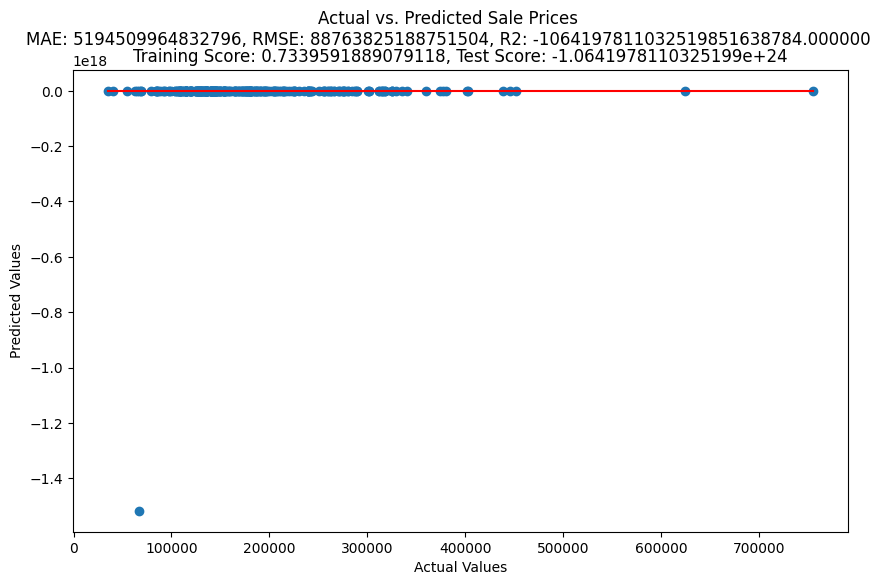

In [629]:
#Show results


plt.figure(figsize=(10,6))
plt.scatter(output_test, test_pred_1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(output_test), max(output_test)], [min(output_test), max(output_test)], color='red')  # Line for perfect prediction
plt.suptitle(f"Actual vs. Predicted Sale Prices\nMAE: {test_mae:.0f}, RMSE: {test_rmse:.0f}, R2: {test_r2:2f}")
plt.title(f"Training Score: {lnr.score(input_train, output_train)}, Test Score: {lnr.score(input_test, output_test)}")
plt.show()

In [630]:
lnr.coef_

array([-3.01907643e+17, -3.01907643e+17, -3.01907643e+17, -3.01907643e+17,
       -3.01907643e+17, -5.66692270e+17, -5.66692270e+17, -5.66692270e+17,
       -5.66692270e+17,  9.98227322e+16,  9.98227322e+16,  9.98227322e+16,
        9.98227322e+16,  9.98227322e+16,  9.98227322e+16,  9.98227322e+16,
        9.98227322e+16,  2.15822868e+18,  2.15822868e+18,  2.15822868e+18,
        6.41431768e+17,  2.15822868e+18,  2.15822868e+18,  5.22442985e+04,
        3.47281339e+04,  3.88706043e+04,  6.62272425e+04,  1.51625087e+05,
       -1.14974874e+03,  1.94569559e+05,  3.15529347e+04,  1.67374005e+04,
       -1.19097391e+05, -1.60258000e+05,  1.83632000e+05,  3.18720000e+04,
        7.85520000e+04,  5.00800000e+03,  4.84800000e+03])

4.2 Build A Model Using A Decision Tree Regressor

In [59]:
# instantiate/initialising the regressor
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor(random_state=42)

In [60]:
dtr.fit(input_train, output_train)

DecisionTreeRegressor(random_state=42)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # type: ignore
import matplotlib.pyplot as plt

In [62]:
# Make Predictions
train_pred_2= dtr.predict(input_train)
test_pred_2 = dtr.predict(input_test)

In [63]:
# Training Set Evaluation
training_mae = mean_absolute_error(output_train, train_pred_2)
training_mse = mean_squared_error(output_train, train_pred_2)
training_rmse = np.sqrt(training_mse)
training_r2 = r2_score(output_train, train_pred_2)

In [64]:
# Test set evaluation
test_mae = mean_absolute_error(output_test, test_pred_2)
test_mse = mean_squared_error(output_test, test_pred_2)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(output_test,test_pred_2)

In [65]:
print(f'Training Evaluation')
print(f'RMSE: {training_rmse}')
print(f'R2: {training_r2}')
print(f'MAE: {training_mae}')
print(f'Test Evaluation')
print(f'RMSE: {test_rmse}')
print(f'R2: {test_r2}')
print(f'MAE: {test_mae}')

Training Evaluation
RMSE: 0.0
R2: 1.0
MAE: 0.0
Test Evaluation
RMSE: 48018.08411471604
R2: 0.6885703207522854
MAE: 28924.821917808218


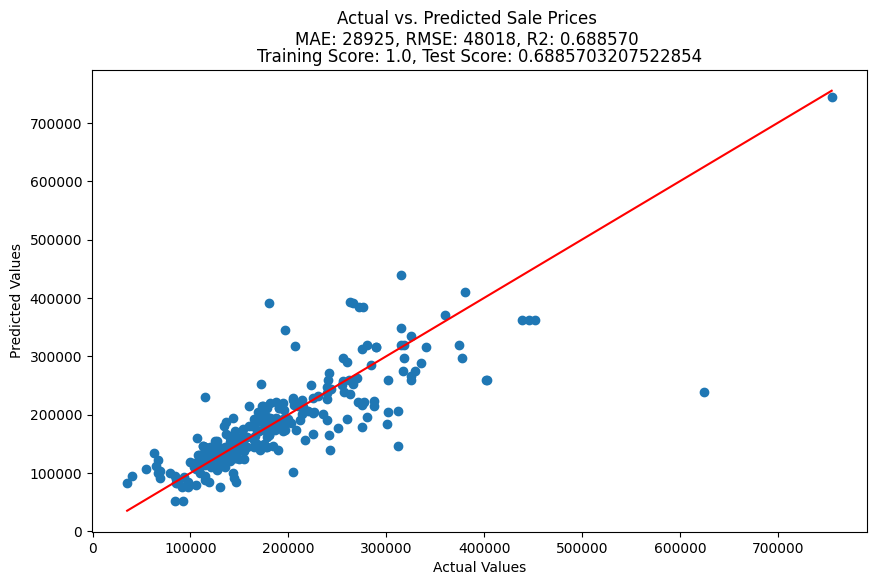

In [66]:
#Show results
plt.figure(figsize=(10,6))
plt.scatter(output_test, test_pred_2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(output_test), max(output_test)], [min(output_test), max(output_test)], color='red')  # Line for perfect prediction
plt.suptitle(f"Actual vs. Predicted Sale Prices\nMAE: {test_mae:.0f}, RMSE: {test_rmse:.0f}, R2: {test_r2:2f}")
plt.title(f"Training Score: {dtr.score(input_train, output_train)}, Test Score: {dtr.score(input_test, output_test)}")
plt.show()

In [639]:
importances = dtr.feature_importances_

In [640]:
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'feature': input.columns, 'importance': importances})

In [641]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [642]:
feature_importances.head(15)

,feature,importance
36,GarageCars,0.363469
30,FullBath,0.124442
29,1stFlrSF,0.116494
35,Fireplaces,0.081678
26,YearBuilt,0.078499
27,TotalBsmtSF,0.058934
34,TotRmsAbvGrd,0.056449
23,LotArea,0.036829
37,MoSold,0.014960
31,HalfBath,0.012898


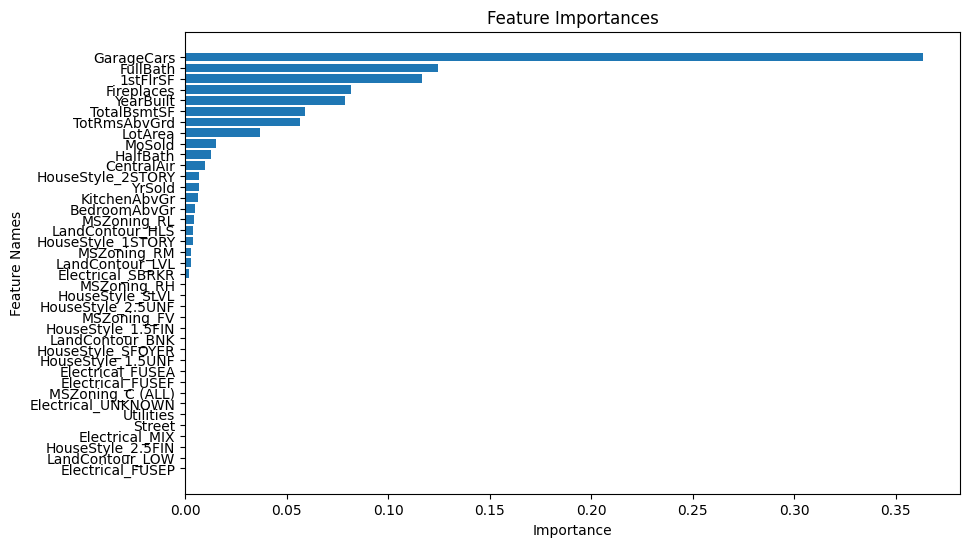

In [643]:
# Plot Feature Imporctace for DTR
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.title("Feature Importances")
plt.ylabel('Feature Names')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

4.3 Build Amodel Using A Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor 

In [68]:
rfr = RandomForestRegressor(random_state=42)

In [69]:
rfr.fit(input_train, output_train)

RandomForestRegressor(random_state=42)

In [70]:

# Make Predictions
train_pred_3= rfr.predict(input_train)
test_pred_3 = rfr.predict(input_test)

In [71]:
# Training Set Evaluation
training_mae = mean_absolute_error(output_train, train_pred_3)
training_mse = mean_squared_error(output_train, train_pred_3)
training_rmse = np.sqrt(training_mse)
training_r2 = r2_score(output_train, train_pred_3)

In [72]:
# Test set evaluation
test_mae = mean_absolute_error(output_test, test_pred_3)
test_mse = mean_squared_error(output_test, test_pred_3)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(output_test,test_pred_3)

In [73]:
print(f'Training Evaluation')
print(f'RMSE: {training_rmse}')
print(f'R2: {training_r2}')
print(f'MAE: {training_mae}')
print(f'Test Evaluation')
print(f'RMSE: {test_rmse}')
print(f'R2: {test_r2}')
print(f'MAE: {test_mae}')

Training Evaluation
RMSE: 12491.337082830072
R2: 0.9741715909541825
MAE: 7899.225236051502
Test Evaluation
RMSE: 32983.13939957563
R2: 0.8530619327943108
MAE: 22361.84226027397


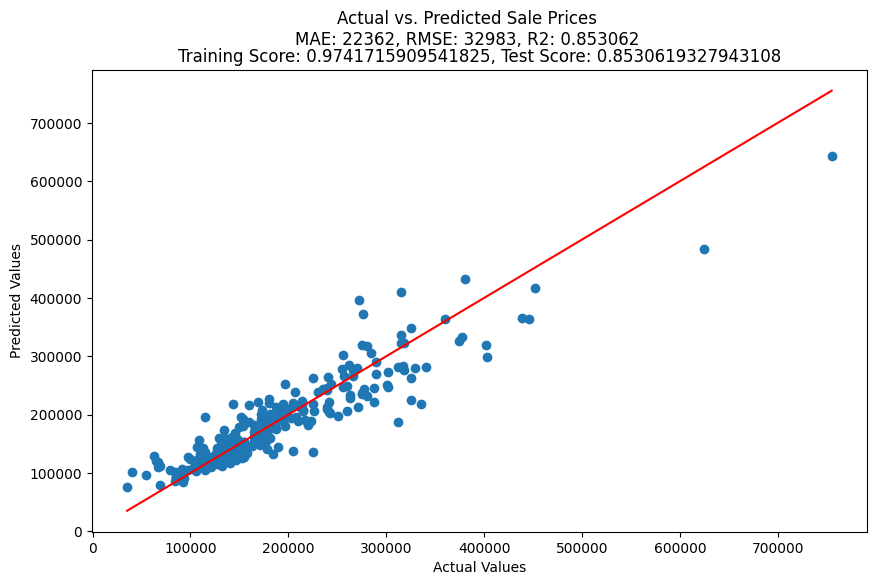

In [74]:
#Show results
plt.figure(figsize=(10,6))
plt.scatter(output_test, test_pred_3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(output_test), max(output_test)], [min(output_test), max(output_test)], color='red')  # Line for perfect prediction
plt.suptitle(f"Actual vs. Predicted Sale Prices\nMAE: {test_mae:.0f}, RMSE: {test_rmse:.0f}, R2: {test_r2:2f}")
plt.title(f"Training Score: {rfr.score(input_train, output_train)}, Test Score: {rfr.score(input_test, output_test)}")
plt.show()

In [75]:
importances_1 = rfr.feature_importances_

In [76]:
# Create a DataFrame to display feature importances
feature_importances_1 = pd.DataFrame({'feature': input.columns, 'importance': importances_1})

In [77]:
feature_importances_1 = feature_importances_1.sort_values(by='importance', ascending=False)

In [78]:
feature_importances_1.head(10)

,feature,importance
36,GarageCars,0.331368
26,YearBuilt,0.162738
29,1stFlrSF,0.099329
27,TotalBsmtSF,0.095661
30,FullBath,0.058075
35,Fireplaces,0.056666
34,TotRmsAbvGrd,0.054262
23,LotArea,0.047718
32,BedroomAbvGr,0.017619
37,MoSold,0.013437


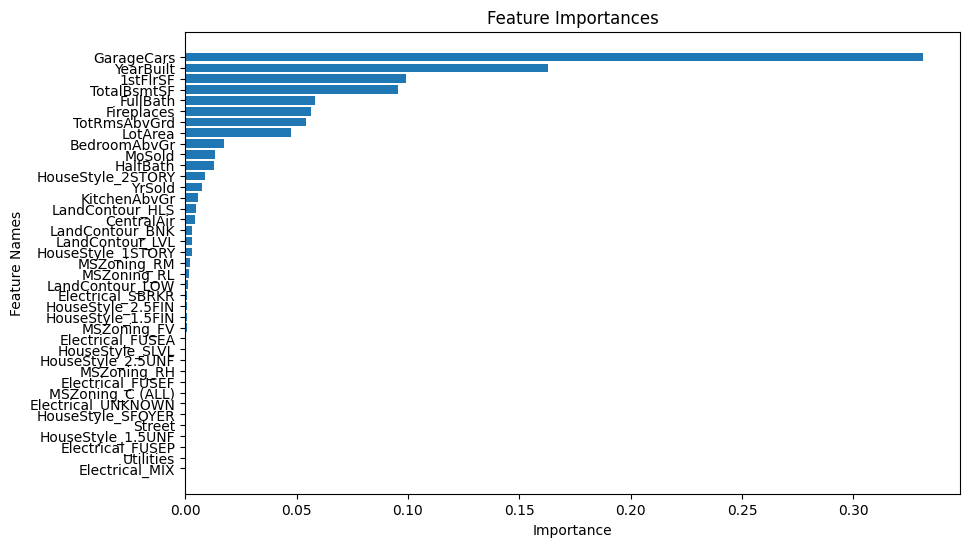

In [79]:
# Plot Feature Imporctace for RFR
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(feature_importances_1['feature'], feature_importances_1['importance'])
plt.title("Feature Importances")
plt.ylabel('Feature Names')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [80]:
# Save the model to a file
import pickle
pickle.dump(rfr, open('houseprice_rfr_model.pkl', 'wb'))

4.4 Build A Model with Optimized hyperparamenters using GridSearchCV

In [657]:
from sklearn.model_selection import GridSearchCV

In [658]:
param_grid = {
    'n_estimators': [300,500],  # Reduced number of trees
    'max_depth': [4, 6, 8, 10],  # Reduced maximum depth
    'max_features': ['sqrt', 'log2', 0.5],  # Removed None and 0.5 to reduce complexity
    'min_samples_split': [2, 5, 10],  # Added min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Added min_samples_leaf
    'max_samples': [0.5,0.7]  # Added max_samples
}

In [659]:
# Instantiate the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

In [660]:
grid_search.fit(input_train, output_train)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


C:\Users\leone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'max_samples': [0.5, 0.7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500]},
             verbose=2)

In [661]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [662]:
best_params

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [663]:
best_rfr = grid_search.best_estimator_

In [664]:
best_rfr

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=0.7,
                      n_estimators=300, random_state=42)

In [665]:
# Make predictions
train_pred_4 = best_rfr.predict(input_train)
test_pred_4= best_rfr.predict(input_test)

In [666]:
# Training Set Evaluation
training_mae = mean_absolute_error(output_train, train_pred_4)
training_mse = mean_squared_error(output_train, train_pred_4)
training_rmse = np.sqrt(training_mse)
training_r2 = r2_score(output_train, train_pred_4)

# Test set evaluation
test_mae = mean_absolute_error(output_test, test_pred_4)
test_mse = mean_squared_error(output_test, test_pred_4)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(output_test,test_pred_4)


In [667]:
print(f'Training Evaluation')
print(f'RMSE: {training_rmse}')
print(f'R2: {training_r2}')
print(f'MAE: {training_mae}')
print(f'Test Evaluation')
print(f'RMSE: {test_rmse}')
print(f'R2: {test_r2}')
print(f'MAE: {test_mae}')

Training Evaluation
RMSE: 20326.49099040951
R2: 0.931608107219815
MAE: 14056.337125445063
Test Evaluation
RMSE: 34333.99099107809
R2: 0.8407795232141
MAE: 22047.776854217558


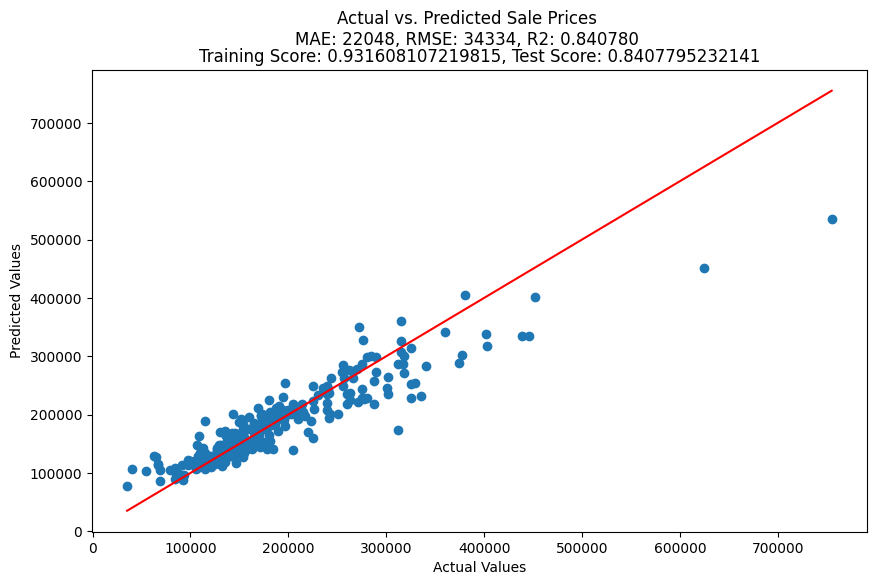

In [668]:
#Show results
plt.figure(figsize=(10,6))
plt.scatter(output_test, test_pred_4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(output_test), max(output_test)], [min(output_test), max(output_test)], color='red')  # Line for perfect prediction
plt.suptitle(f"Actual vs. Predicted Sale Prices\nMAE: {test_mae:.0f}, RMSE: {test_rmse:.0f}, R2: {test_r2:2f}")
plt.title(f"Training Score: {best_rfr.score(input_train, output_train)}, Test Score: {best_rfr.score(input_test, output_test)}")
plt.show()

5. Identify Feature Coefficicnts and Importance

In [669]:
importances_2 = best_rfr.feature_importances_

In [670]:
importances_2

array([6.00426745e-04, 1.87782362e-03, 4.46119776e-04, 5.22567399e-03,
       1.20227150e-02, 2.85728736e-03, 5.25121393e-03, 1.74787223e-03,
       5.73128028e-03, 3.30936055e-03, 1.48104910e-04, 8.18811079e-03,
       1.88439094e-03, 2.66493628e-04, 1.75771952e-02, 4.10275215e-04,
       1.14199269e-03, 2.04496479e-03, 9.56654088e-04, 6.50181238e-05,
       0.00000000e+00, 4.39222506e-03, 5.61800122e-04, 5.82902870e-02,
       6.01538304e-04, 1.43843213e-05, 1.42487879e-01, 1.62515195e-01,
       8.65471378e-03, 1.26340207e-01, 7.38963689e-02, 2.59223417e-02,
       2.21715416e-02, 8.09094638e-03, 7.18429649e-02, 6.00791074e-02,
       1.33923479e-01, 1.75555019e-02, 1.09065450e-02])

In [671]:
feature_importances_2 = pd.DataFrame({'feature': input_train.columns, 'importance': importances_2})

In [672]:
feature_importances_2

,feature,importance
0,MSZoning_C (ALL),0.000600
1,MSZoning_FV,0.001878
2,MSZoning_RH,0.000446
3,MSZoning_RL,0.005226
4,MSZoning_RM,0.012023
5,LandContour_BNK,0.002857
6,LandContour_HLS,0.005251
7,LandContour_LOW,0.001748
8,LandContour_LVL,0.005731
9,HouseStyle_1.5FIN,0.003309


In [673]:
feature_importances_2 = feature_importances_2.sort_values(by='importance', ascending=False)

In [674]:
feature_importances_2.head(15)

,feature,importance
27,TotalBsmtSF,0.162515
26,YearBuilt,0.142488
36,GarageCars,0.133923
29,1stFlrSF,0.126340
30,FullBath,0.073896
34,TotRmsAbvGrd,0.071843
35,Fireplaces,0.060079
23,LotArea,0.058290
31,HalfBath,0.025922
32,BedroomAbvGr,0.022172


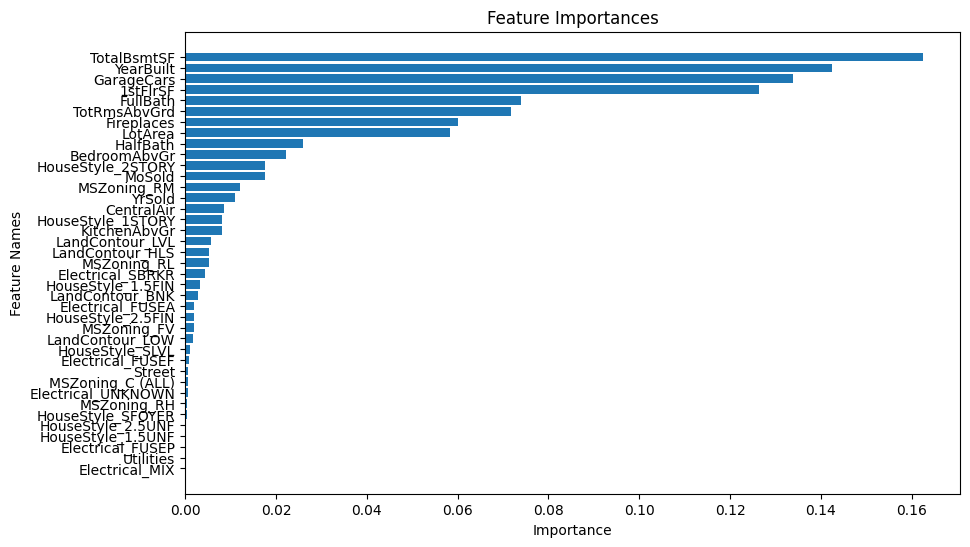

In [675]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(feature_importances_2['feature'], feature_importances_2['importance'])
plt.title("Feature Importances")
plt.ylabel('Feature Names')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

Save Model to pickle file

5. Prediction Testing

In [676]:
import pickle
pickle.dump(best_rfr, open('best_rfr_for_houseprice', 'wb'))

Load and Use model

In [82]:
import pickle 
model = pickle.load(open('houseprice_rfr_model.pkl', 'rb'))

In [83]:
model

RandomForestRegressor(random_state=42)

In [84]:
import pandas as pd
new_data = pd.read_csv('new_house_data.csv')

In [86]:
new_data.head()

,MSZoning,LotArea,Street,LandContour,Utilities,HouseStyle,YearBuilt,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,RL,8000,Pave,Lvl,AllPub,2Story,2003,1564,Y,SBrkr,968,2,1,4,2,6,1,2,2,2008
1,RH,9600,Pave,Bnk,AllPub,1Story,1976,1333,Y,SBrkr,1262,2,0,3,1,6,1,2,5,2007
2,RL,11250,Grvl,Lvl,Nosewa,2Story,2001,920,Y,SBrkr,926,2,1,3,1,6,1,2,9,2008
3,RL,10763,Pave,Lvl,Nosewa,2Story,1915,876,Y,SBrkr,956,1,0,3,1,7,1,3,2,2006
4,C (ALL),14260,Pave,Low,AllPub,2Story,2000,1145,N,FuseF,1145,2,1,4,1,9,1,3,12,2008


In [87]:
# Convert Name to index
#new_data.set_index('MSZoning', inplace=True)

In [88]:
new_data.head()

,MSZoning,LotArea,Street,LandContour,Utilities,HouseStyle,YearBuilt,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,RL,8000,Pave,Lvl,AllPub,2Story,2003,1564,Y,SBrkr,968,2,1,4,2,6,1,2,2,2008
1,RH,9600,Pave,Bnk,AllPub,1Story,1976,1333,Y,SBrkr,1262,2,0,3,1,6,1,2,5,2007
2,RL,11250,Grvl,Lvl,Nosewa,2Story,2001,920,Y,SBrkr,926,2,1,3,1,6,1,2,9,2008
3,RL,10763,Pave,Lvl,Nosewa,2Story,1915,876,Y,SBrkr,956,1,0,3,1,7,1,3,2,2006
4,C (ALL),14260,Pave,Low,AllPub,2Story,2000,1145,N,FuseF,1145,2,1,4,1,9,1,3,12,2008


In [90]:
import houseprice_cleaning_pipeline as hpp

In [91]:
new_data_clean = hpp.data_cleaning(new_data)

---Checking for inconsistencies in the data---
MSZoning: 5 unique values
['RL' 'RH' 'C (ALL)' 'FV' 'RM']
LotArea: 15 unique values
[ 8000  9600 11250 10763 14260 14115 10084 10382  7936  9800 11200 11924
 13000 11423 10920]
Street: 2 unique values
['Pave' 'Grvl']
LandContour: 4 unique values
['Lvl' 'Bnk' 'Low' 'Hls']
Utilities: 3 unique values
['AllPub' 'Nosewa' 'allPub']
HouseStyle: 4 unique values
['2Story' '1Story' '1.5Fin' '1.5Unf']
YearBuilt: 15 unique values
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960]
TotalBsmtSF: 15 unique values
[1564 1333  920  876 1145  796 1686 1205  952  991 1040 1175  912 1207
 1253]
CentralAir: 2 unique values
['Y' 'N']
Electrical: 5 unique values
['SBrkr' 'FuseF' 'FuseP' 'FuseA' 'mix']
1stFlrSF: 15 unique values
[ 968 1262  926  956 1145  796 1694 1107 1034 1077 1076 1075  809 1494
 1253]
FullBath: 3 unique values
[2 1 3]
HalfBath: 2 unique values
[1 0]
BedroomAbvGr: 4 unique values
[4 3 1 2]
KitchenAbvGr: 2 unique value

In [92]:
new_data_clean.head()

,MSZoning,LotArea,Street,LandContour,Utilities,HouseStyle,YearBuilt,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,RL,8000,PAVE,LVL,ALLPUB,2STORY,2003,1564,Y,SBRKR,968,2,1,4,2,6,1,2,2,2008
1,RH,9600,PAVE,BNK,ALLPUB,1STORY,1976,1333,Y,SBRKR,1262,2,0,3,1,6,1,2,5,2007
2,RL,11250,GRVL,LVL,NOSEWA,2STORY,2001,920,Y,SBRKR,926,2,1,3,1,6,1,2,9,2008
3,RL,10763,PAVE,LVL,NOSEWA,2STORY,1915,876,Y,SBRKR,956,1,0,3,1,7,1,3,2,2006
4,C (ALL),14260,PAVE,LOW,ALLPUB,2STORY,2000,1145,N,FUSEF,1145,2,1,4,1,9,1,3,12,2008


In [688]:
print(new_data_clean)

          LotArea  Street LandContour  Utilities HouseStyle  YearBuilt  \
MSZoning                                                                 
RL           8450       1         LVL          1     2STORY       2003   
RL           9600       1         LVL          1     1STORY       1976   
RL          11250       1         LVL          1     2STORY       2001   
RL           9550       1         LVL          1     2STORY       1915   
C (ALL)     14260       1         LVL          1     2STORY       2000   
RL          14115       1         LVL          1     1.5FIN       1993   
FV          10084       1         LVL          1     1STORY       2004   
RL          10382       1         LVL          1     2STORY       1973   
RM           6120       1         LVL          1     1.5FIN       1931   
RL           7420       1         LVL          1     1.5UNF       1939   
RL          11200       1         LVL          1     1STORY       1965   
RL          11924       1         LVL 

In [93]:
import model_houseprice_pipeline as mhp

In [94]:
new_data_modelled = mhp.model_data(new_data_clean)


c:\Users\uizjm1\Documents\Git demo\House-Price-Analysis-and-Model\model_houseprice_pipeline.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Street'] = data['Street'].replace( {'PAVE': 1, 'GRVL': 0, 'Unknown': -1})
c:\Users\uizjm1\Documents\Git demo\House-Price-Analysis-and-Model\model_houseprice_pipeline.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Utilities'] = data['Utilities'].replace( {'ALLPUB': 1, 'NOSEWA': 0, 'Unknown': -1})
c:\Users\uizjm1\Documents\Git demo\House-Price-Analysis-and-Model\model_hous

In [95]:
new_data_modelled.head()

,MSZoning_C (ALL),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_BNK,LandContour_HLS,LandContour_LOW,LandContour_LVL,HouseStyle_1.5FIN,...,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.145480,0.75,0.5,0.500,0.666667,0.333333,0.333333,0.50,0.090909,0.50
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.212942,0.75,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.363636,0.25
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.135842,0.75,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.727273,0.50
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142726,0.50,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.090909,0.00
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.186095,0.75,0.5,0.500,0.333333,0.583333,0.333333,0.75,1.000000,0.50


In [696]:
# Identify which nominal columns are missing from new_data_clean
missing_cols = [col for col in nominal_cols if col not in new_data_clean.columns]
print("Missing columns:", missing_cols)

Missing columns: ['MSZoning']


In [697]:
for col in missing_cols:
    new_data_clean[col] = 'Unknown'  # Or any default value that makes sense for your data

In [698]:
# Encode the data with OneHotEncoder
encoded = onehot.transform(new_data_clean[nominal_cols]).toarray() # type: ignore

# Create DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded, columns=onehot.get_feature_names_out())

# Drop the original nominal columns
new_data_clean = new_data_clean.drop(nominal_cols, axis=1)

# Concatenate the encoded columns with the original data
new_data_modelled = pd.concat([new_data_clean.reset_index(drop=True), encoded_df], axis=1)

# Now you can use this new_data_modelled for your further modeling steps


In [699]:
predictions = model.predict(new_data_modelled)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
